## Implementing SVMs

We'll implement SVM on a synthetic dataset.

We'll also explore capacity control with C and RBF kernels with different gamma values. 

In [20]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

y_train_pred_linear = svm_linear.predict(X_train_scaled)
y_test_pred_linear = svm_linear.predict(X_test_scaled)
print("Linear SVM Train Accuracy:", accuracy_score(y_train, y_train_pred_linear))
print("Linear SVM Test Accuracy:", accuracy_score(y_test, y_test_pred_linear))
print("Linear SVM F1 Score:", f1_score(y_test, y_test_pred_linear))

Linear SVM Train Accuracy: 0.8525
Linear SVM Test Accuracy: 0.86
Linear SVM F1 Score: 0.8679245283018868


In [24]:
# checking how C affects the performance of linear SVM

C = [0.01, 0.1, 1, 10, 100]
y_pred_train_linear_C = []
y_pred_test_linear_C = []

for c in C:
    svm_linear_C = SVC(kernel='linear', C=c, random_state=42)
    svm_linear_C.fit(X_train_scaled, y_train)
    y_pred_train_linear_C.append(svm_linear_C.predict(X_train_scaled))
    y_pred_test_linear_C.append(svm_linear_C.predict(X_test_scaled))

for i, c in enumerate(C):
    print(f"C={c} Train Accuracy:", accuracy_score(y_train, y_pred_train_linear_C[i]))
    print(f"C={c} Test Accuracy:", accuracy_score(y_test, y_pred_test_linear_C[i]))
    print(f"C={c} F1 Score:", f1_score(y_test, y_pred_test_linear_C[i]))
    print("-" * 30, end="\n\n")

C=0.01 Train Accuracy: 0.8425
C=0.01 Test Accuracy: 0.87
C=0.01 F1 Score: 0.8785046728971962
------------------------------

C=0.1 Train Accuracy: 0.845
C=0.1 Test Accuracy: 0.85
C=0.1 F1 Score: 0.8571428571428571
------------------------------

C=1 Train Accuracy: 0.8525
C=1 Test Accuracy: 0.86
C=1 F1 Score: 0.8679245283018868
------------------------------

C=10 Train Accuracy: 0.855
C=10 Test Accuracy: 0.86
C=10 F1 Score: 0.8679245283018868
------------------------------

C=100 Train Accuracy: 0.855
C=100 Test Accuracy: 0.86
C=100 F1 Score: 0.8679245283018868
------------------------------



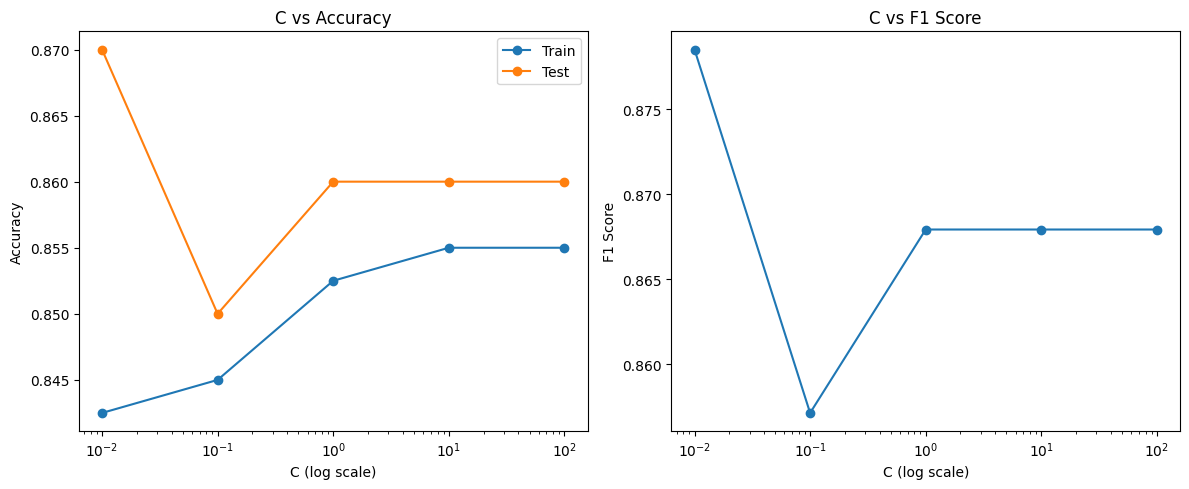

In [ ]:
## plotting C vs train and test accuracy scores and F1 scores

import matplotlib.pyplot as plt

accuracy_scores_train = [accuracy_score(y_train, y_pred) for y_pred in y_pred_train_linear_C]
accuracy_scores_test = [accuracy_score(y_test, y_pred) for y_pred in y_pred_test_linear_C]
f1_scores = [f1_score(y_test, y_pred) for y_pred in y_pred_test_linear_C]
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(C, accuracy_scores_train, marker='o', label='Train')
plt.plot(C, accuracy_scores_test, marker='o', label='Test')
plt.xscale('log')
plt.title('C vs Accuracy')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(C, f1_scores, marker='o')
plt.xscale('log')
plt.title('C vs F1 Score')
plt.xlabel('C (log scale)')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.show()

In [27]:
## observations:
#1. As C increases, the train accuracy increases and test accuracy also increases but after a certain point it starts to decrease which indicates overfitting.
#2. best C value is around 1 or 10 as it gives the best test accuracy and F1 score.

In [28]:
## checking RBF kernel with different capacity control parameters and plotting the comparison with different hyperparameters

C = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1, 10]

y_pred_train_rbf_C_gamma = []
y_pred_test_rbf_C_gamma = []

for c in C:
    for g in gamma:
        svm_rbf_C_gamma = SVC(kernel='rbf', C=c, gamma=g, random_state=42)
        svm_rbf_C_gamma.fit(X_train_scaled, y_train)
        y_pred_train_rbf_C_gamma.append(svm_rbf_C_gamma.predict(X_train_scaled))
        y_pred_test_rbf_C_gamma.append(svm_rbf_C_gamma.predict(X_test_scaled))

for i, (c, g) in enumerate([(c, g) for c in C for g in gamma]):
    print(f"C={c}, gamma={g} Train Accuracy:", accuracy_score(y_train, y_pred_train_rbf_C_gamma[i]))
    print(f"C={c}, gamma={g} Test Accuracy:", accuracy_score(y_test, y_pred_test_rbf_C_gamma[i]))
    print(f"C={c}, gamma={g} F1 Score:", f1_score(y_test, y_pred_test_rbf_C_gamma[i]))
    print("-" * 30, end="\n\n")

C=0.01, gamma=0.01 Train Accuracy: 0.5175
C=0.01, gamma=0.01 Test Accuracy: 0.43
C=0.01, gamma=0.01 F1 Score: 0.0
------------------------------

C=0.01, gamma=0.1 Train Accuracy: 0.8325
C=0.01, gamma=0.1 Test Accuracy: 0.77
C=0.01, gamma=0.1 F1 Score: 0.7472527472527473
------------------------------

C=0.01, gamma=1 Train Accuracy: 0.8175
C=0.01, gamma=1 Test Accuracy: 0.81
C=0.01, gamma=1 F1 Score: 0.8
------------------------------

C=0.01, gamma=10 Train Accuracy: 0.5175
C=0.01, gamma=10 Test Accuracy: 0.43
C=0.01, gamma=10 F1 Score: 0.0
------------------------------

C=0.1, gamma=0.01 Train Accuracy: 0.84
C=0.1, gamma=0.01 Test Accuracy: 0.86
C=0.1, gamma=0.01 F1 Score: 0.8679245283018868
------------------------------

C=0.1, gamma=0.1 Train Accuracy: 0.845
C=0.1, gamma=0.1 Test Accuracy: 0.85
C=0.1, gamma=0.1 F1 Score: 0.8571428571428571
------------------------------

C=0.1, gamma=1 Train Accuracy: 0.9625
C=0.1, gamma=1 Test Accuracy: 0.95
C=0.1, gamma=1 F1 Score: 0.954128440

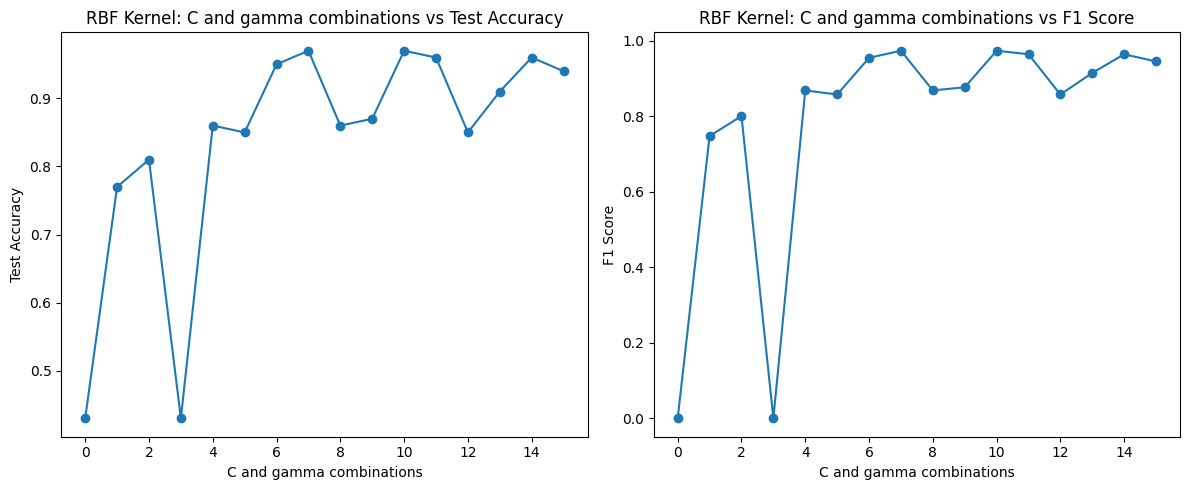

In [30]:
# plotting C vs test accuracy scores and F1 scores for RBF kernel

accuracy_scores_test_rbf = [accuracy_score(y_test, y_pred) for y_pred in y_pred_test_rbf_C_gamma]
f1_scores_rbf = [f1_score(y_test, y_pred) for y_pred in y_pred_test_rbf_C_gamma]
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(len(accuracy_scores_test_rbf)), accuracy_scores_test_rbf, marker='o')
plt.title('RBF Kernel: C and gamma combinations vs Test Accuracy')
plt.xlabel('C and gamma combinations')
plt.ylabel('Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(f1_scores_rbf)), f1_scores_rbf, marker='o')
plt.title('RBF Kernel: C and gamma combinations vs F1 Score')
plt.xlabel('C and gamma combinations')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.show()

In [ ]:
## observations:
# 1. As C increases, the train accuracy increases and test accuracy also increases but after a certain point it starts to decrease. 
# This is because as C increases, the model tries to fit the training data more closely which can lead to overfitting.
# 2. As gamma increases, the train accuracy increases and test accuracy also increases but after a certain point it starts to decrease. 
# This is because as gamma increases, the model becomes more complex and can fit the training data better but can also lead to overfitting.
# 3. best C and gamma combination is around C=1 and gamma=0.1 as it gives the best test accuracy and F1 score, thus giving the best accuracy score of 0.95 and F1 score of 0.95.